# SI140A Final Project - Phase Transition

Team members:

- Hengyu Ai (aihy2023\<at\>shanghaitech.edu.cn)
- Zebang He (hezb2023\<at\>shanghaitech.edu.cn)
- Sizhe Zhao (zhaoszh2023\<at\>shanghaitech.edu.cn)

## Part I: Percolation

### Problem Description

Using an $n \times n$ grid as a percolation model, we want to find the percolation threshold $p^*$, which is the probability that a site is open, such that the system percolates. A system percolates if there is a path of open sites from the top to the bottom of the grid.

### Solution

<!-- TODO: -->

Threshold for n = 20: 0.5905094146728516


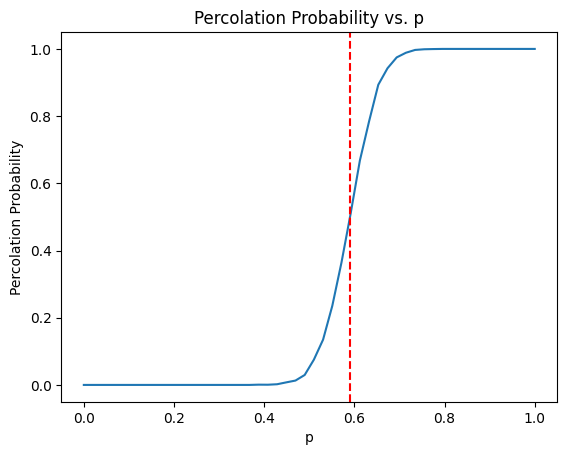

Threshold for n = 50: 0.5922451019287109


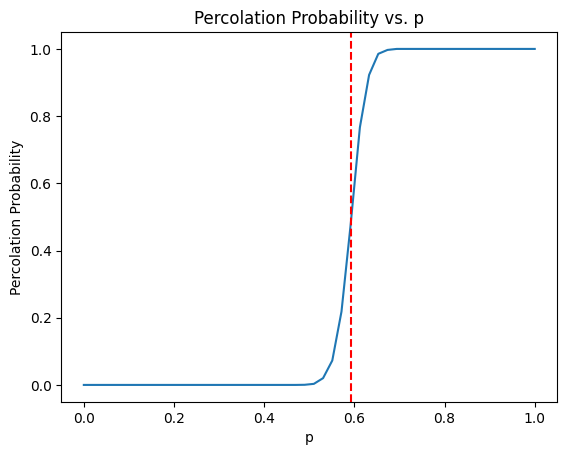

Threshold for n = 100: 0.5927896499633789


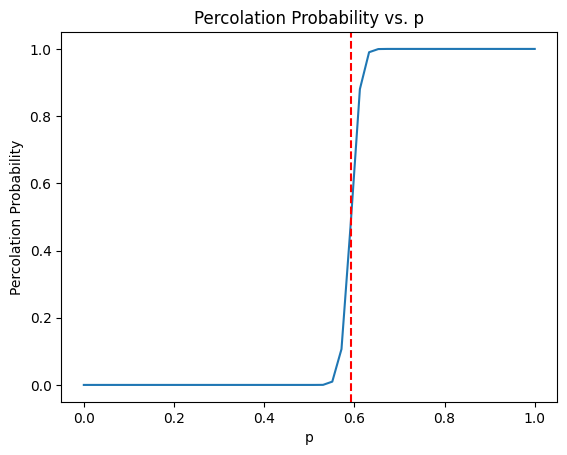

In [7]:
# TODO: Monte Carlo Simulation

import numpy as np

"""
Generate a grid of size 'n' x 'n' with each cell having a probability 'p' of being open.
"""


def generate_grid(n: int, p: float) -> np.ndarray:
    return np.random.choice([0, 1], (n, n), p=[p, 1 - p])


"""
Use Breadth First Search to check if the grid percolates from the top to the bottom.
"""


def check_percolation(grid: np.ndarray) -> bool:
    q = []
    n = grid.shape[0]
    visited = np.zeros((n, n), dtype=bool)
    for i in range(n):
        if grid[i, 0] == 0:
            q.append((i, 0))
            visited[i, 0] = True
    while q:
        x, y = q.pop(0)
        if y == n - 1:
            return True
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and grid[nx, ny] == 0 and not visited[nx, ny]:
                q.append((nx, ny))
                visited[nx, ny] = True
    return False


"""
Calculate the probability of percolation using Monte Carlo Simulation.
"""


def calc_percolation_probability(n: int, p: float, num_trials: int) -> float:
    count = 0
    for _ in range(num_trials):
        grid = generate_grid(n, p)
        if check_percolation(grid):
            count += 1
    return count / num_trials


def calc_threshold(n: int, num_trials: int) -> float:
    lo, hi = 0.0, 1.0
    while hi - lo > 1e-6:
        mid = (lo + hi) / 2
        if calc_percolation_probability(n, mid, num_trials) < 0.5:
            lo = mid
        else:
            hi = mid
    return lo


def plot_probability(n: int, num_trials: int, threshold: float) -> None:
    import matplotlib.pyplot as plt
    x = np.linspace(0, 1, 50)
    y = [calc_percolation_probability(n, p, num_trials) for p in x]
    plt.plot(x, y)
    plt.axvline(x=threshold, color='r', linestyle='--')
    plt.xlabel('p')
    plt.ylabel('Percolation Probability')
    plt.title('Percolation Probability vs. p')
    plt.show()


def main():
    num_trials = 5000
    for n in [20, 50, 100]:
        threshold = calc_threshold(n, num_trials)
        print(f"Threshold for n = {n}: {threshold}")
        plot_probability(n, num_trials, threshold)
    


main()

## Part II: Ising Model

### Problem Description

<!-- TODO: -->